In [1]:
#Importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.feature_selection import VarianceThreshold

In [2]:
#Reading the dataset file
data = pd.read_csv('H2HBABBA1355.csv')

#Checking the number of rows and columns
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200704858,WAKE llc,2019-10-09 00:00:00,2019.0,1.929908e+09,2019-09-23,20190921,20190923,20191008.0,USD,RV,1.0,NaN,94519.82,20190923.0,NAA8,1.929908e+09,0
1,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930619e+09,2020-03-07,20200307,20200307,20200322.0,USD,RV,1.0,NaN,21249.76,20200307.0,NAH4,1.930619e+09,1
2,CA02,0140105686,SYSC in,2019-11-21 00:00:00,2019.0,2.960591e+09,2019-11-04,20191104,20191104,20191116.0,CAD,RV,1.0,NaN,35095.50,20191106.0,CA10,2.960591e+09,0
3,U001,0200782001,GORDO,2019-01-24 00:00:00,2019.0,1.928626e+09,2019-01-15,20190115,20190115,20190215.0,USD,RV,1.0,NaN,20076.07,20190115.0,NA3B,1.928626e+09,0
4,U001,0200729942,SA corporation,NaN,2020.0,1.930887e+09,2020-05-11,20200511,20200511,20200526.0,USD,RV,1.0,NaN,10130.11,20200511.0,NAA8,1.930887e+09,1


## NULL IMPUTATION

In [3]:
#Checking the number of Null columns

data.isnull().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    4
isOpen                        0
dtype: int64

In [4]:
#Dropping the area_business column as it is 100% null
#Not doing any modifications in clear_date as it is our Target Column

data.drop('area_business',axis=1,inplace=True)

#Checking the dataset
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200704858,WAKE llc,2019-10-09 00:00:00,2019.0,1.929908e+09,2019-09-23,20190921,20190923,20191008.0,USD,RV,1.0,94519.82,20190923.0,NAA8,1.929908e+09,0
1,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930619e+09,2020-03-07,20200307,20200307,20200322.0,USD,RV,1.0,21249.76,20200307.0,NAH4,1.930619e+09,1
2,CA02,0140105686,SYSC in,2019-11-21 00:00:00,2019.0,2.960591e+09,2019-11-04,20191104,20191104,20191116.0,CAD,RV,1.0,35095.50,20191106.0,CA10,2.960591e+09,0
3,U001,0200782001,GORDO,2019-01-24 00:00:00,2019.0,1.928626e+09,2019-01-15,20190115,20190115,20190215.0,USD,RV,1.0,20076.07,20190115.0,NA3B,1.928626e+09,0
4,U001,0200729942,SA corporation,NaN,2020.0,1.930887e+09,2020-05-11,20200511,20200511,20200526.0,USD,RV,1.0,10130.11,20200511.0,NAA8,1.930887e+09,1


## CONSTANT COLUMN REMOVAL

In [5]:
#Checking and printing the Constant Columns

constant_cols =  [x for x in data.columns if data[x].nunique()==1] 
print(constant_cols)

['posting_id']


In [6]:
#Dropping the Constant Columns

data.drop(constant_cols,axis=1,inplace=True)

## QUASI-CONSTANT COLUMN REMOVAL

In [7]:
#Checking document_type if its Quasi-Constant or not

data['document type'].value_counts()

RV    49996
X2        4
Name: document type, dtype: int64

In [8]:
#Dropping document_type column as it is Quasi-Constant

data.drop('document type',axis=1,inplace=True)

## REMOVING UNNECESSARY COLUMNS

In [9]:
#Checking the co-relation between doc_id & invoice_id

column_1 = data["doc_id"]
column_2 = data["invoice_id"]
correlation = column_1.corr(column_2)
print(correlation)

1.0


In [10]:
#Checking the co-relation between document_create_date & document_create_date.1

column_1 = data["document_create_date"]
column_2 = data["document_create_date.1"]
correlation = column_1.corr(column_2)
print(correlation)

0.9936869024681568


In [11]:
data['posting_date'] = data['posting_date'].astype('datetime64[ns]')
data['posting_date'] = data['posting_date'].dt.strftime('%Y%m%d')
data['posting_date'] = data['posting_date'].astype(int)

column_1 = data["posting_date"]
column_2 = data["baseline_create_date"]
correlation = column_1.corr(column_2)
print(correlation)

0.999283391254635


In [12]:
#Converting CAD values to USD

data['total_open_amount']=np.where(data['invoice_currency']=='CAD',data['total_open_amount']*0.81,data['total_open_amount'])

In [13]:
#Dropping Unnecessary Columns
#Dropping invoice_id as it is same as doc_id 

data.drop('invoice_id',axis=1,inplace=True)
data.drop('document_create_date.1',axis=1,inplace=True)
data.drop('baseline_create_date',axis=1,inplace=True)
data.drop('invoice_currency',axis=1,inplace=True)

## DUPLICATE COLUMNS REMOVAL

In [14]:
#Transposing the dataset

transposed=data.T
data.T.head()

,0,1,2,3,4,5,6,7,8,9,...,49990,49991,49992,49993,49994,49995,49996,49997,49998,49999
business_code,U001,U001,CA02,U001,U001,U001,U001,U001,U001,U001,...,U001,U001,U013,U001,U001,U001,U001,U001,U001,U001
cust_number,0200704858,0200769623,0140105686,0200782001,0200729942,200726979,0200771157,0200783189,0200762301,0200418007,...,0200707822,0200772670,0140103592,0200762301,200769623,0200722444,0200778870,0200729828,0200772670,0200936373
name_customer,WAKE llc,WAL-MAR co,SYSC in,GORDO,SA corporation,BJ'S,WEIS co,PERFOR,C&S WH corp,AM llc,...,PUBLI foundation,ASSOCIAT us,COMERCI corporation,C&S WH corporation,WAL-MAR corporation,PERFOR us,C corporation,KENNETH,ASSOCIAT llc,SUPE llc
clear_date,2019-10-09 00:00:00,NaN,2019-11-21 00:00:00,2019-01-24 00:00:00,NaN,2019-04-24 00:00:00,2020-03-12 00:00:00,2020-02-27 00:00:00,2019-07-05 00:00:00,2019-02-27 00:00:00,...,2019-12-30 00:00:00,2019-08-08 00:00:00,2019-09-16 00:00:00,2020-03-03 00:00:00,NaN,2019-08-01 00:00:00,2020-01-24 00:00:00,2019-03-15 00:00:00,2019-04-10 00:00:00,2019-12-30 00:00:00
buisness_year,2019.0,2020.0,2019.0,2019.0,2020.0,2019.0,2020.0,2020.0,2019.0,2019.0,...,2019.0,2019.0,2019.0,2020.0,2020.0,2019.0,2020.0,2019.0,2019.0,2019.0


In [15]:
#Checking if there are any duplicated rows after transposing

data.T.duplicated().sum()

0

In [16]:
#Removing if there are any duplicated rows after transposing
#Checking the number of rows and columns after removing duplicated rows

transposed.drop_duplicates(keep='first', inplace=True)
data.T.shape

(12, 50000)

In [17]:
#Checking the number of rows and columns of the dataset

data.shape

(50000, 12)

In [18]:
#Checking if there are any duplicated rows

data.duplicated().sum()

1176

In [19]:
#Removing if there are any duplicated rows

data.drop_duplicates(keep='first', inplace=True)

In [20]:
#Checking the number of rows and columns of the dataset after removing duplicated rows

data.shape

(48824, 12)

In [21]:
#Checking the dataset

data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200704858,WAKE llc,2019-10-09 00:00:00,2019.0,1.929908e+09,20190923,20190921,20191008.0,94519.820,NAA8,0
1,U001,0200769623,WAL-MAR co,NaN,2020.0,1.930619e+09,20200307,20200307,20200322.0,21249.760,NAH4,1
2,CA02,0140105686,SYSC in,2019-11-21 00:00:00,2019.0,2.960591e+09,20191104,20191104,20191116.0,28427.355,CA10,0
3,U001,0200782001,GORDO,2019-01-24 00:00:00,2019.0,1.928626e+09,20190115,20190115,20190215.0,20076.070,NA3B,0
4,U001,0200729942,SA corporation,NaN,2020.0,1.930887e+09,20200511,20200511,20200526.0,10130.110,NAA8,1


## DATE-TIME CONVERSION

In [22]:
#Checking Data-Types

data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date              int32
document_create_date      int64
due_in_date             float64
total_open_amount       float64
cust_payment_terms       object
isOpen                    int64
dtype: object

In [23]:
#DateTimeConversion of clear_date

data['clear_date']= pd.to_datetime(data['clear_date'])
data['posting_date']= pd.to_datetime(data['posting_date'], format='%Y%m%d')
data['due_in_date'] = pd.to_datetime(data['due_in_date'], format='%Y%m%d')
data['document_create_date'] = pd.to_datetime(data['document_create_date'], format='%Y%m%d')

#Checking the dataset
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
0,U001,0200704858,WAKE llc,2019-10-09,2019.0,1.929908e+09,2019-09-23,2019-09-21,2019-10-08,94519.820,NAA8,0
1,U001,0200769623,WAL-MAR co,NaT,2020.0,1.930619e+09,2020-03-07,2020-03-07,2020-03-22,21249.760,NAH4,1
2,CA02,0140105686,SYSC in,2019-11-21,2019.0,2.960591e+09,2019-11-04,2019-11-04,2019-11-16,28427.355,CA10,0
3,U001,0200782001,GORDO,2019-01-24,2019.0,1.928626e+09,2019-01-15,2019-01-15,2019-02-15,20076.070,NA3B,0
4,U001,0200729942,SA corporation,NaT,2020.0,1.930887e+09,2020-05-11,2020-05-11,2020-05-26,10130.110,NAA8,1


In [24]:
#Checking Data-Types

data.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
document_create_date    datetime64[ns]
due_in_date             datetime64[ns]
total_open_amount              float64
cust_payment_terms              object
isOpen                           int64
dtype: object

## SORTING AND FINDING THE TARGET VARIABLE

In [25]:
#Sorting the dataframe 

data.sort_values(by=['posting_date'], inplace = True)

In [26]:
#Checking the dataset
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen
1085,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,13514.43,NAH4,0
10423,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,580.67,NAH4,0
12054,U001,0200769623,WAL-MAR,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,12491.86,NAH4,0
19163,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,23084.67,NAH4,0
35793,U001,0200744019,TARG corp,2019-01-11,2019.0,1.928532e+09,2018-12-30,2018-12-31,2019-01-14,11309.19,NAA8,0
...,...,...,...,...,...,...,...,...,...,...,...,...
34427,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-06-02,16099.20,NAA8,1
28405,U001,100026809,PRES corporation,NaT,2020.0,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1
40736,U001,0200763229,MAINES llc,NaT,2020.0,1.930917e+09,2020-05-19,2020-05-19,2020-06-03,17544.11,NAA8,1
44671,U001,0100058056,SIMPLO trust,NaT,2020.0,1.930925e+09,2020-05-20,2020-05-20,2020-06-04,30456.65,NAA8,1


In [27]:
#Calculating the delay between clear_date and due_in_date

delay = (data.clear_date - data.due_in_date)

In [28]:
#Adding Delay column

data['delay'] = delay
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay
1085,U001,0200769623,WAL-MAR llc,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,13514.43,NAH4,0,-5 days
10423,U001,0200769623,WAL-MAR systems,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,580.67,NAH4,0,-5 days
12054,U001,0200769623,WAL-MAR,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,12491.86,NAH4,0,1 days
19163,U001,0200769623,WAL-MAR us,2019-01-10,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,23084.67,NAH4,0,-4 days
35793,U001,0200744019,TARG corp,2019-01-11,2019.0,1.928532e+09,2018-12-30,2018-12-31,2019-01-14,11309.19,NAA8,0,-3 days


## SPLITTING THE DATAFRAME INTO TRAIN AND TEST

In [29]:
#Separating the dataset on the basis of clear_data is NULL or not

main_train = data[data.clear_date.isnull() == False]
main_test = data[data.clear_date.isnull() == True]
main_train.shape, main_test.shape

((39113, 13), (9711, 13))

In [30]:
#Removing days from delay

main_train['delay']=main_train['delay'].dt.days
main_train.delay.head(10)

1085    -5
10423   -5
12054    1
19163   -4
35793   -3
13751    0
32138    1
22026    1
40317    1
41355   -5
Name: delay, dtype: int64

## SPLITTING THE MAIN_TRAIN DATAFRAME INTO TRAIN, TEST AND VALIDATION

In [31]:
# Converting the main_train into X and y so that we can pass it onto train_test_split function

# X --> contains the dataframe without the target i.e delay
X = main_train.drop('delay',axis=1)

# y --> contains only the target value 
y = main_train['delay']

In [32]:
#Splitting the data first into two part -- doing a 70:30 split i.e 30% data fed to intermediate test data set

X_train,X_inter_test,y_train,y_inter_test = train_test_split(X,y,test_size=0.3,random_state=0 , shuffle = False)

In [33]:
# 
X_val,X_test,y_val,y_test = train_test_split(X_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [34]:
X_train.shape , X_val.shape , X_test.shape

((27379, 12), (5867, 12), (5867, 12))

## EDA

<AxesSubplot:xlabel='delay', ylabel='Density'>

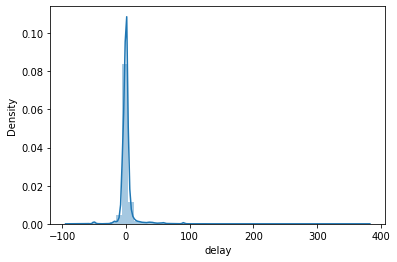

In [35]:
#Distribution of the target column 

sns.distplot(y_train)

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

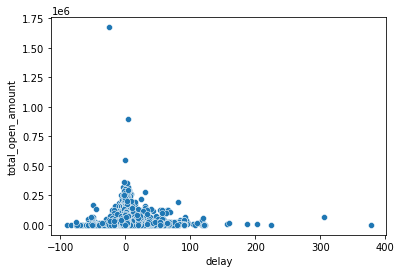

In [36]:
#Scatter-plot delay v/s total_open_amount

sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="total_open_amount")

<AxesSubplot:xlabel='delay', ylabel='doc_id'>

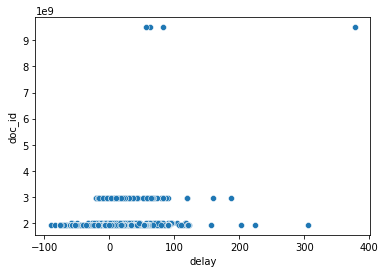

In [37]:
#Scatter-plot delay v/s doc_id

sns.scatterplot(data=X_train.merge(y_train,on = X_train.index), x="delay", y="doc_id")

<AxesSubplot:xlabel='delay'>

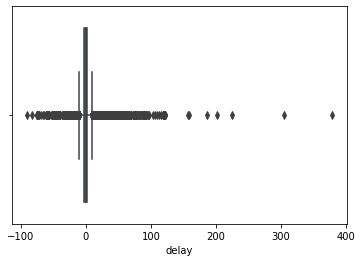

In [38]:
#Plotting box plot to figure out outliers

sns.boxplot(x=X_train.merge(y_train,on = X_train.index).delay)

In [39]:
X_train.name_customer.nunique()

3339

## FEATURE ENGINEERING

In [40]:
#Checking datatypes

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27379 entries, 1085 to 20823
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         27379 non-null  object        
 1   cust_number           27379 non-null  object        
 2   name_customer         27379 non-null  object        
 3   clear_date            27379 non-null  datetime64[ns]
 4   buisness_year         27379 non-null  float64       
 5   doc_id                27379 non-null  float64       
 6   posting_date          27379 non-null  datetime64[ns]
 7   document_create_date  27379 non-null  datetime64[ns]
 8   due_in_date           27379 non-null  datetime64[ns]
 9   total_open_amount     27379 non-null  float64       
 10  cust_payment_terms    27379 non-null  object        
 11  isOpen                27379 non-null  int64         
dtypes: datetime64[ns](4), float64(3), int64(1), object(4)
memory usage: 2.7

In [41]:
#This function will delete a column from train, val and test

def column_delete(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis=1 ,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

##### Label Encoding 'business_code'

In [42]:
#For business_code we are using Label Encoding

business_code_enc = LabelEncoder()

business_code_enc.fit(X_train['business_code'])

X_train['business_code_enc'] = business_code_enc.transform(X_train['business_code'])
X_val['business_code_enc'] = business_code_enc.transform(X_val['business_code'])
X_test['business_code_enc'] = business_code_enc.transform(X_test['business_code'])

##### Label Encoding 'name_customer'

In [43]:
#For name_customer we are using Label Encoding

name_customer_enc = LabelEncoder()

name_customer_enc.fit(X_train['name_customer'])

X_train['name_customer_enc'] = name_customer_enc.transform(X_train['name_customer'])

In [44]:
#Searching for the new catagories in the validation set
diff = set(X_val['name_customer'])-set(name_customer_enc.classes_)

#Adding them to the classess variable 
for items in diff:
    name_customer_enc.classes_ = np.append(name_customer_enc.classes_,items)
    
X_val['name_customer_enc'] = name_customer_enc.transform(X_val['name_customer'])


#Same thing for test also

diff2 = set(X_test['name_customer'])-set(name_customer_enc.classes_)
for items in diff2:
    name_customer_enc.classes_ = np.append(name_customer_enc.classes_,items)
    
X_test['name_customer_enc'] = name_customer_enc.transform(X_test['name_customer']) 

##### Label Encoding 'cust_number'

In [45]:
#For cust_number we are using Label Encoding

cust_number_enc = LabelEncoder()

cust_number_enc.fit(X_train['cust_number'])

X_train['cust_number_enc'] = cust_number_enc.transform(X_train['cust_number'])

In [46]:
#Searching for the new catagories in the validation set
diff = set(X_val['cust_number'])-set(cust_number_enc.classes_)

#Adding them to the classess variable 
for items in diff:
    cust_number_enc.classes_ = np.append(cust_number_enc.classes_,items)
    
X_val['cust_number_enc'] = cust_number_enc.transform(X_val['cust_number'])


#Same thing for test also

diff2 = set(X_test['cust_number'])-set(cust_number_enc.classes_)
for items in diff2:
    cust_number_enc.classes_ = np.append(cust_number_enc.classes_,items)
    
X_test['cust_number_enc'] = cust_number_enc.transform(X_test['cust_number']) 

##### Label Encoding 'cust_payment_terms'

In [47]:
#For cust_payment_terms we are using Label Encoding

cust_payment_terms_enc = LabelEncoder()

cust_payment_terms_enc.fit(X_train['cust_payment_terms'])

X_train['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_train['cust_payment_terms'])

In [48]:
#Searching for the new catagories in the validation set
diff = set(X_val['cust_payment_terms'])-set(cust_payment_terms_enc.classes_)

#Adding them to the classess variable 
for items in diff:
    cust_payment_terms_enc.classes_ = np.append(cust_payment_terms_enc.classes_,items)
    
X_val['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_val['cust_payment_terms'])


#Same thing for test also

diff2 = set(X_test['cust_payment_terms'])-set(cust_payment_terms_enc.classes_)
for items in diff2:
    cust_payment_terms_enc.classes_ = np.append(cust_payment_terms_enc.classes_,items)
    
X_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_test['cust_payment_terms']) 

In [49]:
#Dropping the columns after encoding them

X_train ,X_val, X_test = column_delete(['business_code','cust_number', 'cust_payment_terms', 'name_customer'])

In [50]:
#Checking the dataset

X_train.head()

,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,isOpen,business_code_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc
1085,2019-01-09,2019.0,1.928541e+09,2018-12-30,2018-12-29,2019-01-14,13514.43,0,1,3237,724,33
10423,2019-01-09,2019.0,1.928539e+09,2018-12-30,2018-12-29,2019-01-14,580.67,0,1,3238,724,33
12054,2019-01-15,2019.0,1.928542e+09,2018-12-30,2018-12-29,2019-01-14,12491.86,0,1,3230,724,33
19163,2019-01-10,2019.0,1.928542e+09,2018-12-30,2018-12-30,2019-01-14,23084.67,0,1,3240,724,33
35793,2019-01-11,2019.0,1.928532e+09,2018-12-30,2018-12-31,2019-01-14,11309.19,0,1,3000,672,19


In [51]:
#Checking the dataset info

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27379 entries, 1085 to 20823
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   clear_date              27379 non-null  datetime64[ns]
 1   buisness_year           27379 non-null  float64       
 2   doc_id                  27379 non-null  float64       
 3   posting_date            27379 non-null  datetime64[ns]
 4   document_create_date    27379 non-null  datetime64[ns]
 5   due_in_date             27379 non-null  datetime64[ns]
 6   total_open_amount       27379 non-null  float64       
 7   isOpen                  27379 non-null  int64         
 8   business_code_enc       27379 non-null  int32         
 9   name_customer_enc       27379 non-null  int32         
 10  cust_number_enc         27379 non-null  int32         
 11  cust_payment_terms_enc  27379 non-null  int32         
dtypes: datetime64[ns](4), float64(3), int32(4),

In [52]:
#Extracting day,month and year from dates 

X_train['clear_date_day'] = X_train['clear_date'].dt.day
X_train['clear_date_month'] = X_train['clear_date'].dt.month
X_train['clear_date_year'] = X_train['clear_date'].dt.year

X_val['clear_date_day'] = X_val['clear_date'].dt.day
X_val['clear_date_month'] = X_val['clear_date'].dt.month
X_val['clear_date_year'] = X_val['clear_date'].dt.year

X_test['clear_date_day'] = X_test['clear_date'].dt.day
X_test['clear_date_month'] = X_test['clear_date'].dt.month
X_test['clear_date_year'] = X_test['clear_date'].dt.year




X_train['posting_date_day'] = X_train['posting_date'].dt.day
X_train['posting_date_month'] = X_train['posting_date'].dt.month
X_train['posting_date_year'] = X_train['posting_date'].dt.year

X_val['posting_date_day'] = X_val['posting_date'].dt.day
X_val['posting_date_month'] = X_val['posting_date'].dt.month
X_val['posting_date_year'] = X_val['posting_date'].dt.year

X_test['posting_date_day'] = X_test['posting_date'].dt.day
X_test['posting_date_month'] = X_test['posting_date'].dt.month
X_test['posting_date_year'] = X_test['posting_date'].dt.year




X_train['document_create_date_day'] = X_train['document_create_date'].dt.day
X_train['document_create_date_month'] = X_train['document_create_date'].dt.month
X_train['document_create_date_year'] = X_train['document_create_date'].dt.year

X_val['document_create_date_day'] = X_val['document_create_date'].dt.day
X_val['document_create_date_month'] = X_val['document_create_date'].dt.month
X_val['document_create_date_year'] = X_val['document_create_date'].dt.year

X_test['document_create_date_day'] = X_test['document_create_date'].dt.day
X_test['document_create_date_month'] = X_test['document_create_date'].dt.month
X_test['document_create_date_year'] = X_test['document_create_date'].dt.year




X_train['due_in_date_day'] = X_train['due_in_date'].dt.day
X_train['due_in_date_month'] = X_train['due_in_date'].dt.month
X_train['due_in_date_year'] = X_train['due_in_date'].dt.year

X_val['due_in_date_day'] = X_val['due_in_date'].dt.day
X_val['due_in_date_month'] = X_val['due_in_date'].dt.month
X_val['due_in_date_year'] = X_val['due_in_date'].dt.year

X_test['due_in_date_day'] = X_test['due_in_date'].dt.day
X_test['due_in_date_month'] = X_test['due_in_date'].dt.month
X_test['due_in_date_year'] = X_test['due_in_date'].dt.year

In [53]:
#Dropping the date columns after separating day,month and year

X_train ,X_val, X_test = column_delete(['clear_date','posting_date','document_create_date', 'due_in_date'])

In [54]:
#Checking the number of row and columns

X_train.shape

(27379, 20)

## FEATURE SELECTION

In [55]:
#Checking co-relation between the delay and other columns

X_train.merge(y_train,on = X_train.index).corr()

,key_0,buisness_year,doc_id,total_open_amount,isOpen,business_code_enc,name_customer_enc,cust_number_enc,cust_payment_terms_enc,clear_date_day,...,posting_date_day,posting_date_month,posting_date_year,document_create_date_day,document_create_date_month,document_create_date_year,due_in_date_day,due_in_date_month,due_in_date_year,delay
key_0,1.000000,NaN,-0.001904,-0.002600,NaN,-0.000798,-0.000694,-0.004121,0.008178,0.007547,...,-0.004359,0.011104,-0.005202,-0.003211,0.013098,-0.009970,0.007613,0.009776,-0.008876,0.005778
buisness_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc_id,-0.001904,NaN,1.000000,0.115276,NaN,-0.487758,-0.016941,-0.367524,-0.475563,0.014386,...,0.004677,0.005992,0.011315,0.006486,0.005347,0.018294,-0.010513,-0.000345,-0.049604,0.164759
total_open_amount,-0.002600,NaN,0.115276,1.000000,NaN,-0.087468,-0.008713,-0.054043,-0.172645,-0.001946,...,0.013620,0.004683,-0.001187,0.017775,0.004553,0.002509,-0.004033,-0.003685,0.010783,-0.007787
isOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
business_code_enc,-0.000798,NaN,-0.487758,-0.087468,NaN,1.000000,-0.031383,0.121398,0.493933,0.025593,...,0.003312,-0.008331,-0.010907,0.005407,-0.010096,-0.013136,0.004885,0.021290,0.003144,-0.002645
name_customer_enc,-0.000694,NaN,-0.016941,-0.008713,NaN,-0.031383,1.000000,0.143851,0.117669,0.009333,...,-0.001408,-0.001883,-0.020247,-0.001778,-0.001361,-0.019757,0.007121,-0.017132,0.007669,-0.020699
cust_number_enc,-0.004121,NaN,-0.367524,-0.054043,NaN,0.121398,0.143851,1.000000,0.356749,0.039833,...,-0.005440,-0.029185,-0.004988,-0.004792,-0.031846,-0.000014,0.013125,-0.032340,-0.026306,0.120036
cust_payment_terms_enc,0.008178,NaN,-0.475563,-0.172645,NaN,0.493933,0.117669,0.356749,1.000000,-0.010998,...,0.005875,0.010598,-0.019598,0.003754,0.009346,-0.017287,0.008436,0.042171,-0.042055,0.060127
clear_date_day,0.007547,NaN,0.014386,-0.001946,NaN,0.025593,0.009333,0.039833,-0.010998,1.000000,...,-0.344876,-0.002906,0.018944,-0.339755,-0.002649,0.011976,0.547608,-0.093863,0.021003,0.045461


<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

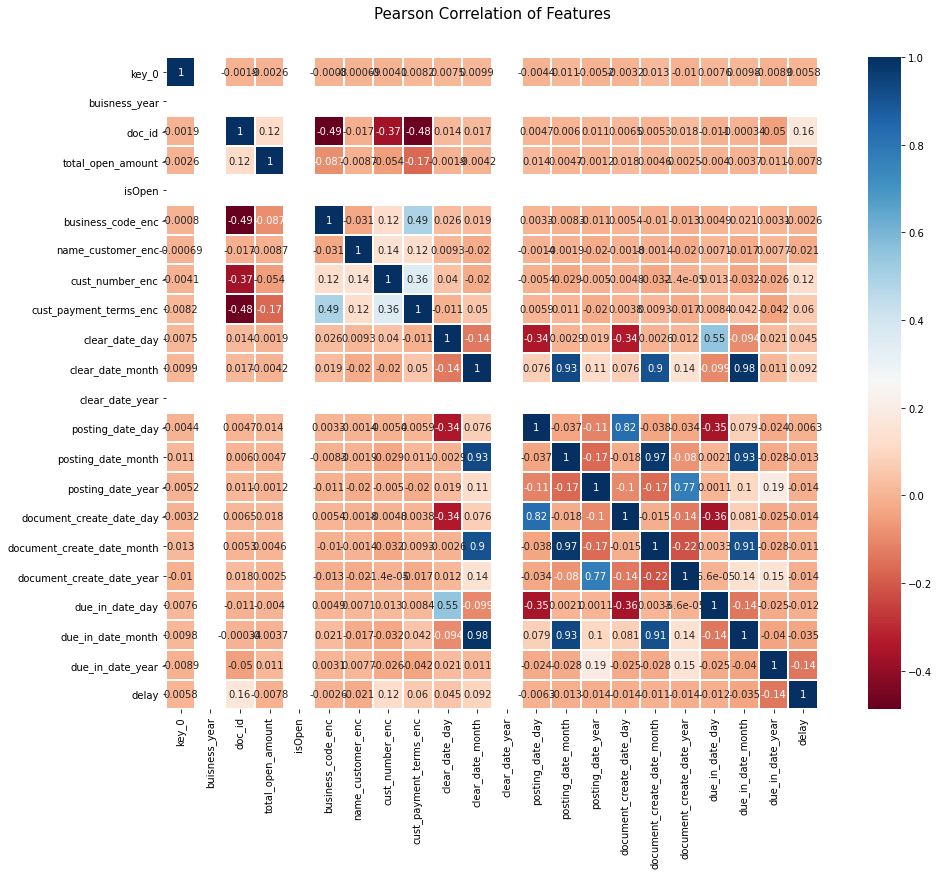

In [56]:
#Checking the heatmap and determining the feature selection

colormap = plt.cm.RdBu
plt.figure(figsize=(18,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap=colormap, linecolor='white', annot=True)

In [57]:
#Dropping the constant-columns

X_train,X_val ,X_test = column_delete(['buisness_year', 'isOpen', 'clear_date_year'])

In [58]:
#Checking dataset info

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27379 entries, 1085 to 20823
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   doc_id                      27379 non-null  float64
 1   total_open_amount           27379 non-null  float64
 2   business_code_enc           27379 non-null  int32  
 3   name_customer_enc           27379 non-null  int32  
 4   cust_number_enc             27379 non-null  int32  
 5   cust_payment_terms_enc      27379 non-null  int32  
 6   clear_date_day              27379 non-null  int64  
 7   clear_date_month            27379 non-null  int64  
 8   posting_date_day            27379 non-null  int64  
 9   posting_date_month          27379 non-null  int64  
 10  posting_date_year           27379 non-null  int64  
 11  document_create_date_day    27379 non-null  int64  
 12  document_create_date_month  27379 non-null  int64  
 13  document_create_date_year   

In [59]:
#Visualising the important features
 
def tree_based_feature_importance(X_train,y_train):
    from sklearn.ensemble import RandomForestRegressor
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(X_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": X_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=X_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

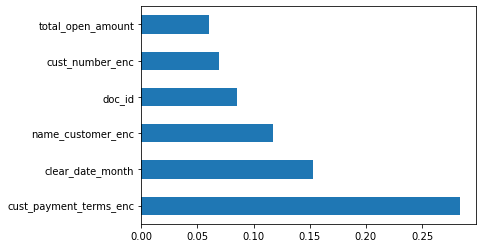

In [60]:
#Checking feature importance

feature_importance=tree_based_feature_importance(X_train,y_train)

In [61]:
#Checking the column remaining

X_train.columns

Index(['doc_id', 'total_open_amount', 'business_code_enc', 'name_customer_enc',
       'cust_number_enc', 'cust_payment_terms_enc', 'clear_date_day',
       'clear_date_month', 'posting_date_day', 'posting_date_month',
       'posting_date_year', 'document_create_date_day',
       'document_create_date_month', 'document_create_date_year',
       'due_in_date_day', 'due_in_date_month', 'due_in_date_year'],
      dtype='object')

In [62]:
#Dropping unnecessary columns

X_train,X_val ,X_test = column_delete(['business_code_enc', 'clear_date_day','clear_date_month', 'posting_date_day', 'posting_date_month',
       'posting_date_year', 'due_in_date_day', 'due_in_date_month', 'due_in_date_year'])

In [63]:
#Checking the info of dataset

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27379 entries, 1085 to 20823
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   doc_id                      27379 non-null  float64
 1   total_open_amount           27379 non-null  float64
 2   name_customer_enc           27379 non-null  int32  
 3   cust_number_enc             27379 non-null  int32  
 4   cust_payment_terms_enc      27379 non-null  int32  
 5   document_create_date_day    27379 non-null  int64  
 6   document_create_date_month  27379 non-null  int64  
 7   document_create_date_year   27379 non-null  int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 1.6 MB


## CREATING A BASE MODEL (LINEAR REGRESSION)

In [64]:
# Defining Lists to Store in the Results and Names of Algorithms

Algorithm = []
MSE_Score = []

In [65]:
from sklearn.linear_model import LinearRegression

Algorithm.append('Linear Regression')

base_model = LinearRegression()

base_model.fit(X_train, y_train)

LinearRegression()

In [66]:
y_predict_val = base_model.predict(X_val)

In [67]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_val, y_predict_val, squared=False)

6.911388545330225

In [68]:
y_predict_test = base_model.predict(X_test)

mean_squared_error(y_test, y_predict_test, squared=False)

10.146615051715857

In [69]:
MSE_Score.append(mean_squared_error(y_test, y_predict_test))

## CREATING ANOTHER MODEL (XGBOOST)

In [70]:
import xgboost as xgb

Algorithm.append('XGB Regressor')

xg_model = xgb.XGBRegressor()

In [71]:
xg_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [72]:
y_predict_val = xg_model.predict(X_val)

In [73]:
mean_squared_error(y_val, y_predict_val, squared=False)

5.076765101234279

In [74]:
y_predict_test = xg_model.predict(X_test)

mean_squared_error(y_test, y_predict_test, squared=False)

7.336101305385609

In [75]:
MSE_Score.append(mean_squared_error(y_test, y_predict_test))

## CREATING ANOTHER MODEL (DECISION TREE REGRESSION)

In [76]:
from sklearn.tree import DecisionTreeRegressor

Algorithm.append('Decision Tree Regressor')

DT_model = DecisionTreeRegressor(random_state=0 , max_depth=1)

In [77]:
DT_model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1, random_state=0)

In [78]:
y_predict_val = DT_model.predict(X_val)

In [79]:
mean_squared_error(y_val, y_predict_val, squared=False)

5.67615675606422

In [80]:
y_predict_test = DT_model.predict(X_test)

mean_squared_error(y_test, y_predict_test, squared=False)

9.116435992583078

In [81]:
MSE_Score.append(mean_squared_error(y_test, y_predict_test))

## CREATING ANOTHER MODEL (RANDOM FOREST REGRESSION)

In [82]:
from sklearn.ensemble import RandomForestRegressor

Algorithm.append('Random Forest Regressor')

RF_model = RandomForestRegressor()

In [83]:
RF_model.fit(X_train, y_train)

RandomForestRegressor()

In [84]:
y_predict_val = RF_model.predict(X_val)

In [85]:
mean_squared_error(y_val, y_predict_val, squared=False)

5.715131409911321

In [86]:
y_predict_test = RF_model.predict(X_test)

mean_squared_error(y_test, y_predict_test, squared=False)

8.11094072646398

In [87]:
MSE_Score.append(mean_squared_error(y_test, y_predict_test))

In [88]:
# Just Combining the Lists into a DataFrame for a Better Visualisation
Comparison = pd.DataFrame(list(zip(Algorithm, MSE_Score)), columns = ['Algorithm', 'MSE_Score'])

In [89]:
# Score Card
Comparison

,Algorithm,MSE_Score
0,Linear Regression,102.953797
1,XGB Regressor,53.818382
2,Decision Tree Regressor,83.109405
3,Random Forest Regressor,65.787359


## THE LOST DATA

In [90]:
#See again delay is all null
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay
40258,U001,0200974851,RESTA foundation,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-18,191.02,NAD1,1,NaT
35592,U001,0200152991,JET,NaT,2020.0,1.930556e+09,2020-02-27,2020-02-22,2020-03-30,18859.50,NA32,1,NaT
4219,U001,0200706844,WINC co,NaT,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-03-13,8279.50,NAA8,1,NaT
49438,U001,200769623,WAL-MAR associates,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,16306.50,NAH4,1,NaT
45659,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930563e+09,2020-02-27,2020-02-24,2020-03-13,14786.63,NAH4,1,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34427,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-06-02,16099.20,NAA8,1,NaT
28405,U001,100026809,PRES corporation,NaT,2020.0,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1,NaT
40736,U001,0200763229,MAINES llc,NaT,2020.0,1.930917e+09,2020-05-19,2020-05-19,2020-06-03,17544.11,NAA8,1,NaT
44671,U001,0100058056,SIMPLO trust,NaT,2020.0,1.930925e+09,2020-05-20,2020-05-20,2020-06-04,30456.65,NAA8,1,NaT


In [91]:
#Cheking null columns

main_test.isna().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9711
buisness_year              0
doc_id                     0
posting_date               0
document_create_date       0
due_in_date                0
total_open_amount          0
cust_payment_terms         0
isOpen                     0
delay                   9711
dtype: int64

In [92]:
#Dropping the delay column from main_test and keeping that in X_main_test
X_main_test = main_test.drop(['delay'],axis=1)

#Also lets drop delay from main_test itself
main_test.drop(['delay'], inplace =True,axis=1)

#### Label Encoding 'business_code' (In test set)

In [93]:
business_code_enc = LabelEncoder()

business_code_enc.fit(X_main_test['business_code'])

X_main_test['business_code_enc'] = business_code_enc.transform(X_main_test['business_code'])

#### Label Encoding 'name_customer' (In test set)

In [94]:
#Again new classes are there in the main_test set

temp = set(X_main_test['name_customer'])-set(name_customer_enc.classes_)
for items in temp:
    name_customer_enc.classes_= np.append(name_customer_enc.classes_,items)

X_main_test['name_customer_enc'] = name_customer_enc.transform(X_main_test['name_customer'])

#### Label Encoding 'cust_number' (In test set)

In [95]:
#Again new classes are there in the main_test set

temp2 = set(X_main_test['cust_number'])-set(cust_number_enc.classes_)
for items in temp2:
    cust_number_enc.classes_= np.append(cust_number_enc.classes_,items)
    
X_main_test['cust_number_enc'] = cust_number_enc.transform(X_main_test['cust_number'])

#### Label Encoding 'cust_payment_terms' (In test set)

In [96]:
#Again new classes are there in the main_test set

temp3 = set(X_main_test['cust_payment_terms'])-set(cust_payment_terms_enc.classes_)
for items in temp3:
    cust_payment_terms_enc.classes_= np.append(cust_payment_terms_enc.classes_,items)
    
X_main_test['cust_payment_terms_enc'] = cust_payment_terms_enc.transform(X_main_test['cust_payment_terms'])

In [97]:
#Dropping the columns after encoding them

X_main_test.drop(['business_code', 'name_customer', 'cust_number','cust_payment_terms'],inplace =True ,axis=1)

In [98]:
#Extracting day,month and year from dates

X_main_test['clear_date_day'] = X_main_test['clear_date'].dt.day
X_main_test['clear_date_month'] = X_main_test['clear_date'].dt.month
X_main_test['clear_date_year'] = X_main_test['clear_date'].dt.year


X_main_test['posting_date_day'] = X_main_test['posting_date'].dt.day
X_main_test['posting_date_month'] = X_main_test['posting_date'].dt.month
X_main_test['posting_date_year'] = X_main_test['posting_date'].dt.year


X_main_test['document_create_date_day'] = X_main_test['document_create_date'].dt.day
X_main_test['document_create_date_month'] = X_main_test['document_create_date'].dt.month
X_main_test['document_create_date_year'] = X_main_test['document_create_date'].dt.year


X_main_test['due_in_date_day'] = X_main_test['due_in_date'].dt.day
X_main_test['due_in_date_month'] = X_main_test['due_in_date'].dt.month
X_main_test['due_in_date_year'] = X_main_test['due_in_date'].dt.year

In [99]:
#Dropping the date columns after separating the day,month and year

X_main_test.drop(['clear_date', 'posting_date', 'document_create_date', 'due_in_date'],inplace =True ,axis=1)

In [100]:
#Checking the dataset info

X_main_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9711 entries, 40258 to 44244
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   buisness_year               9711 non-null   float64
 1   doc_id                      9711 non-null   float64
 2   total_open_amount           9711 non-null   float64
 3   isOpen                      9711 non-null   int64  
 4   business_code_enc           9711 non-null   int32  
 5   name_customer_enc           9711 non-null   int32  
 6   cust_number_enc             9711 non-null   int32  
 7   cust_payment_terms_enc      9711 non-null   int32  
 8   clear_date_day              0 non-null      float64
 9   clear_date_month            0 non-null      float64
 10  clear_date_year             0 non-null      float64
 11  posting_date_day            9711 non-null   int64  
 12  posting_date_month          9711 non-null   int64  
 13  posting_date_year           

In [101]:
#Checking remaining columns in X_main_test dataset

X_main_test.columns

Index(['buisness_year', 'doc_id', 'total_open_amount', 'isOpen',
       'business_code_enc', 'name_customer_enc', 'cust_number_enc',
       'cust_payment_terms_enc', 'clear_date_day', 'clear_date_month',
       'clear_date_year', 'posting_date_day', 'posting_date_month',
       'posting_date_year', 'document_create_date_day',
       'document_create_date_month', 'document_create_date_year',
       'due_in_date_day', 'due_in_date_month', 'due_in_date_year'],
      dtype='object')

In [102]:
#Checking remaining columns in X_train dataset

X_train.columns

Index(['doc_id', 'total_open_amount', 'name_customer_enc', 'cust_number_enc',
       'cust_payment_terms_enc', 'document_create_date_day',
       'document_create_date_month', 'document_create_date_year'],
      dtype='object')

In [103]:
#We have to drop the same columns in X_main_test as the one we dropped in X_train

X_main_test.drop(['buisness_year', 'isOpen', 'clear_date_year', 'business_code_enc', 'clear_date_day','clear_date_month', 'posting_date_day', 'posting_date_month',
       'posting_date_year', 'due_in_date_day', 'due_in_date_month', 'due_in_date_year'],inplace =True ,axis=1)

In [104]:
#Checking the dataset

X_train.head()

,doc_id,total_open_amount,name_customer_enc,cust_number_enc,cust_payment_terms_enc,document_create_date_day,document_create_date_month,document_create_date_year
1085,1.928541e+09,13514.43,3237,724,33,29,12,2018
10423,1.928539e+09,580.67,3238,724,33,29,12,2018
12054,1.928542e+09,12491.86,3230,724,33,29,12,2018
19163,1.928542e+09,23084.67,3240,724,33,30,12,2018
35793,1.928532e+09,11309.19,3000,672,19,31,12,2018


In [105]:
#Checking the dataset

X_main_test.head()

,doc_id,total_open_amount,name_customer_enc,cust_number_enc,cust_payment_terms_enc,document_create_date_day,document_create_date_month,document_create_date_year
40258,1.930578e+09,191.02,2499,866,27,27,2,2020
35592,1.930556e+09,18859.50,1541,412,12,22,2,2020
4219,1.930566e+09,8279.50,3294,594,19,25,2,2020
49438,1.930577e+09,16306.50,3231,1130,33,27,2,2020
45659,1.930563e+09,14786.63,3237,724,33,24,2,2020


## FINAL PART

In [106]:
#Predicting the delay

last_result = xg_model.predict(X_main_test)
last_result = pd.Series(last_result,name='delay')

In [107]:
#Resetting the index of main_test so that we can merge delay series with it

main_test.reset_index(drop=True,inplace=True)

In [108]:
#Merging the delay column

Predict = main_test.merge(last_result , on = X_main_test.index )
Predict

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay
0,40258,U001,0200974851,RESTA foundation,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-18,191.02,NAD1,1,-4.977635
1,35592,U001,0200152991,JET,NaT,2020.0,1.930556e+09,2020-02-27,2020-02-22,2020-03-30,18859.50,NA32,1,-4.828520
2,4219,U001,0200706844,WINC co,NaT,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-03-13,8279.50,NAA8,1,1.272033
3,49438,U001,200769623,WAL-MAR associates,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,16306.50,NAH4,1,-4.951461
4,45659,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930563e+09,2020-02-27,2020-02-24,2020-03-13,14786.63,NAH4,1,-2.483274
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,34427,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-06-02,16099.20,NAA8,1,0.117757
9707,28405,U001,100026809,PRES corporation,NaT,2020.0,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1,0.801396
9708,40736,U001,0200763229,MAINES llc,NaT,2020.0,1.930917e+09,2020-05-19,2020-05-19,2020-06-03,17544.11,NAA8,1,0.920097
9709,44671,U001,0100058056,SIMPLO trust,NaT,2020.0,1.930925e+09,2020-05-20,2020-05-20,2020-06-04,30456.65,NAA8,1,13.418846


In [109]:
#Converting the delay values into integer format

Predict['delay'] = Predict['delay'].astype(int)

In [110]:
#Converting the delay values into timedelta/days format

change_time = pd.to_timedelta(Predict['delay'], unit='D')
print(change_time)

Predict['delay'] = change_time 

0      -4 days
1      -4 days
2       1 days
3      -4 days
4      -2 days
         ...  
9706    0 days
9707    0 days
9708    0 days
9709   13 days
9710    0 days
Name: delay, Length: 9711, dtype: timedelta64[ns]


In [111]:
#Pushing the values in clear_date after adding due_in_date with delay

Predict['predicted_payment_date'] = Predict['due_in_date'] + Predict['delay']

In [112]:
#The predicted clear_date is here

Predict

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay,predicted_payment_date
0,40258,U001,0200974851,RESTA foundation,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-18,191.02,NAD1,1,-4 days,2020-03-14
1,35592,U001,0200152991,JET,NaT,2020.0,1.930556e+09,2020-02-27,2020-02-22,2020-03-30,18859.50,NA32,1,-4 days,2020-03-26
2,4219,U001,0200706844,WINC co,NaT,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-03-13,8279.50,NAA8,1,1 days,2020-03-14
3,49438,U001,200769623,WAL-MAR associates,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,16306.50,NAH4,1,-4 days,2020-03-09
4,45659,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930563e+09,2020-02-27,2020-02-24,2020-03-13,14786.63,NAH4,1,-2 days,2020-03-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,34427,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-06-02,16099.20,NAA8,1,0 days,2020-06-02
9707,28405,U001,100026809,PRES corporation,NaT,2020.0,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1,0 days,2020-05-29
9708,40736,U001,0200763229,MAINES llc,NaT,2020.0,1.930917e+09,2020-05-19,2020-05-19,2020-06-03,17544.11,NAA8,1,0 days,2020-06-03
9709,44671,U001,0100058056,SIMPLO trust,NaT,2020.0,1.930925e+09,2020-05-20,2020-05-20,2020-06-04,30456.65,NAA8,1,13 days,2020-06-17


In [113]:
#Again converting the delay values into integer format as we have to put them into range buckets

Predict['delay'] = Predict['delay'].dt.days

In [114]:
#Adding Range Buckets of delay

Predict.loc[Predict['delay']<0,'range'] = "<0 Days"
Predict.loc[(Predict['delay']>=0) & (Predict['delay']<=15),'range'] = "0-15 Days"
Predict.loc[(Predict['delay']>15) & (Predict['delay']<=30),'range'] = "16-30 Days"
Predict.loc[(Predict['delay']>30) & (Predict['delay']<=45),'range'] = "31-45 Days"
Predict.loc[(Predict['delay']>45),'range'] = ">45  Days"

Predict['range'].value_counts()

0-15 Days     5806
<0 Days       3803
>45  Days       36
16-30 Days      35
31-45 Days      31
Name: range, dtype: int64

In [115]:
#Checking the dataset

Predict

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,due_in_date,total_open_amount,cust_payment_terms,isOpen,delay,predicted_payment_date,range
0,40258,U001,0200974851,RESTA foundation,NaT,2020.0,1.930578e+09,2020-02-27,2020-02-27,2020-03-18,191.02,NAD1,1,-4,2020-03-14,<0 Days
1,35592,U001,0200152991,JET,NaT,2020.0,1.930556e+09,2020-02-27,2020-02-22,2020-03-30,18859.50,NA32,1,-4,2020-03-26,<0 Days
2,4219,U001,0200706844,WINC co,NaT,2020.0,1.930566e+09,2020-02-27,2020-02-25,2020-03-13,8279.50,NAA8,1,1,2020-03-14,0-15 Days
3,49438,U001,200769623,WAL-MAR associates,NaT,2020.0,1.930577e+09,2020-02-27,2020-02-27,2020-03-13,16306.50,NAH4,1,-4,2020-03-09,<0 Days
4,45659,U001,0200769623,WAL-MAR llc,NaT,2020.0,1.930563e+09,2020-02-27,2020-02-24,2020-03-13,14786.63,NAH4,1,-2,2020-03-11,<0 Days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,34427,U001,200765011,MAINES systems,NaT,2020.0,1.930915e+09,2020-05-18,2020-05-18,2020-06-02,16099.20,NAA8,1,0,2020-06-02,0-15 Days
9707,28405,U001,100026809,PRES corporation,NaT,2020.0,1.930916e+09,2020-05-19,2020-05-19,2020-05-29,402.50,NA10,1,0,2020-05-29,0-15 Days
9708,40736,U001,0200763229,MAINES llc,NaT,2020.0,1.930917e+09,2020-05-19,2020-05-19,2020-06-03,17544.11,NAA8,1,0,2020-06-03,0-15 Days
9709,44671,U001,0100058056,SIMPLO trust,NaT,2020.0,1.930925e+09,2020-05-20,2020-05-20,2020-06-04,30456.65,NAA8,1,13,2020-06-17,0-15 Days
